Exploratory Data Analysis (EDA)

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Summary Statistics

In [4]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
print("Median Age:", df['Age'].median())

Median Age: 28.0


In [6]:
print("Fare Standard Deviation:", df['Fare'].std())

Fare Standard Deviation: 49.6934285971809


In [7]:
print("Sex Distribution:\n", df['Sex'].value_counts())

Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


Histograms & Boxplots (Numerical Features)

In [8]:
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title='Age Distribution by Survival')
fig.show()

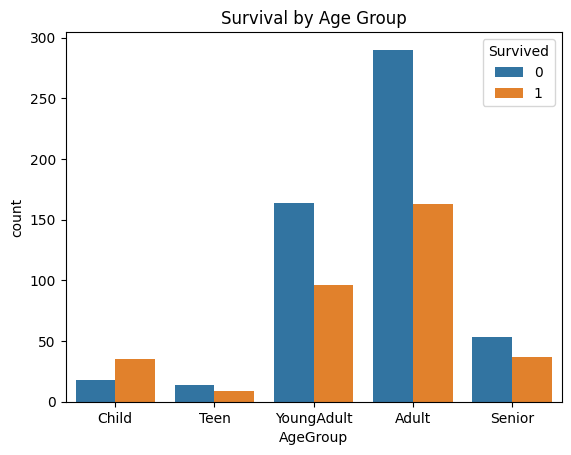

In [75]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])

sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival by Age Group")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

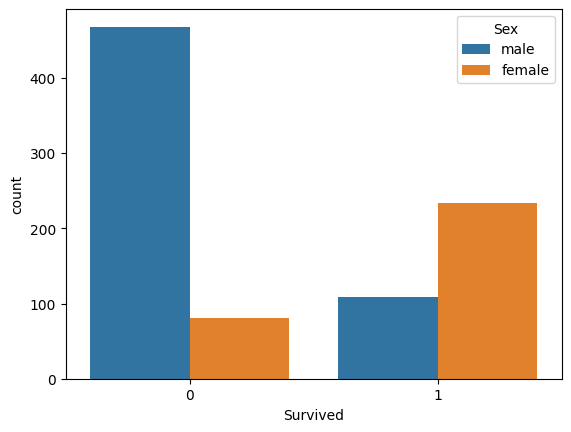

In [52]:
sns.countplot(x="Survived", hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

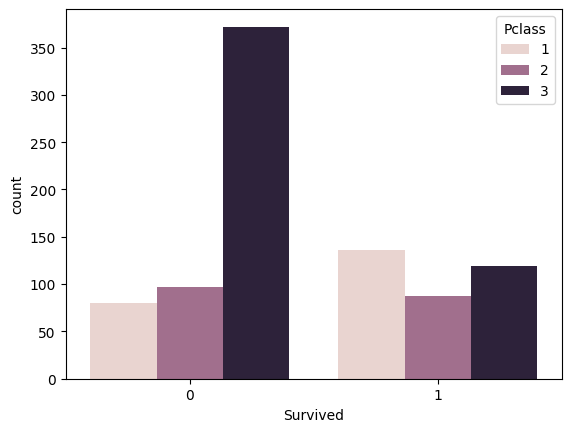

In [53]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

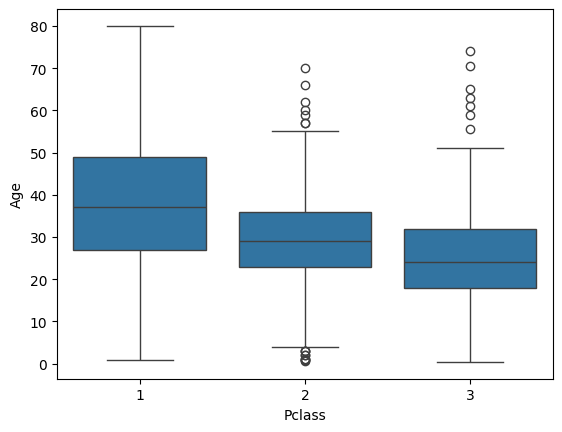

In [54]:
sns.boxplot(x='Pclass',y='Age',data=df)


In [56]:
# These columns don’t help with prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [57]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [58]:
df['Age'].fillna(df['Age'].median(),inplace=True)

/tmp/ipython-input-58-1527141296.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [59]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-59-3744086084.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [60]:
#Too many null values
df.drop(columns='Cabin', inplace=True)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder=LabelEncoder()

In [63]:
df["Age"]=encoder.fit_transform(df['Age'])

In [65]:
df["Sex"]=encoder.fit_transform(df['Sex'])

In [67]:
df["Embarked"]=encoder.fit_transform(df['Embarked'])

In [68]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28,1,0,7.2500,2
1,1,1,0,51,1,0,71.2833,0
2,1,3,0,34,0,0,7.9250,2
3,1,1,0,47,1,0,53.1000,2
4,0,3,1,47,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,13.0000,2
887,1,1,0,24,0,0,30.0000,2
888,0,3,0,36,1,2,23.4500,2
889,1,1,1,34,0,0,30.0000,0


## Correlation Matrix &  Pairplot

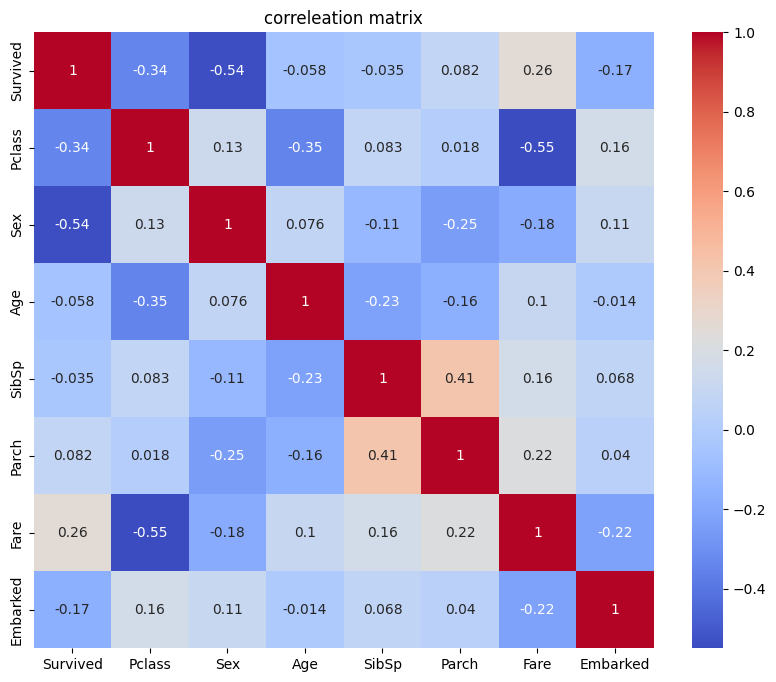

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("correleation matrix")
plt.show()

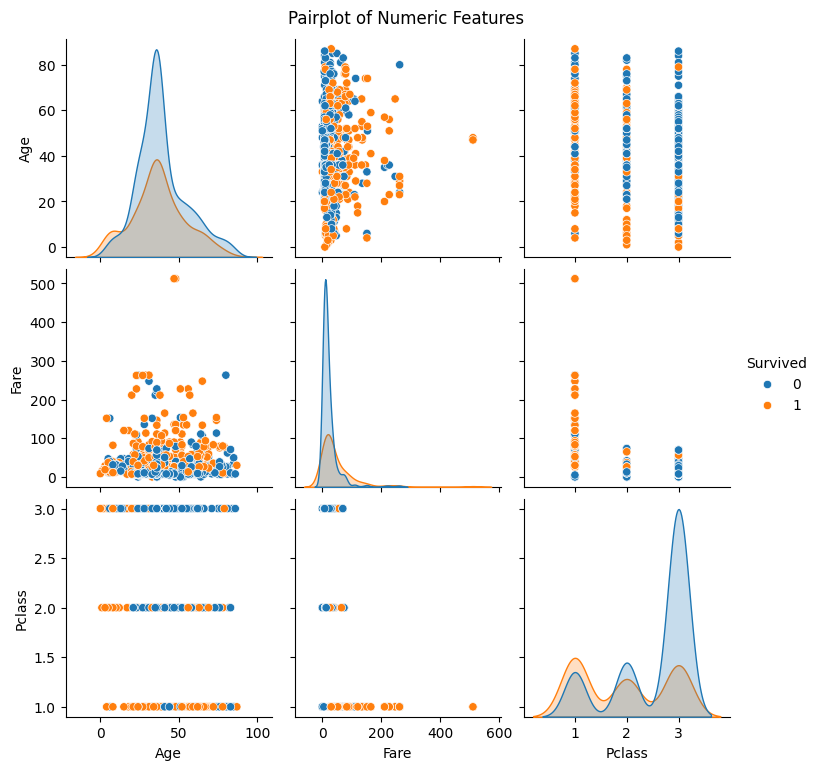

In [70]:
# Pairplot with selected features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

## Conclusion
In this task, we performed detailed Exploratory Data Analysis (EDA) on the Titanic dataset to understand feature distributions, relationships, and hidden patterns.